# Sumeet Ghumare

## Tasks

Step 1: Download the dataset from the link available above. 

Step 2: Perform proper analysis of the dataset and draw conclusions based on your analysis.

Step 3: Build a Machine Learning Model to predict output based on the input column.

Step 4: **Bonus (max weightage) Make sure to apply:
Proper outlier detection and treatment.
Feature Engineering
Hyperparameter Tuning

Step 5: Use appropriate evaluation metrics and compare all the models and write your observations i.e. why is one model better than the other?

Step 6: **Bonus (max weightage) Build a Linear Regression model by performing appropriate feature engineering.

Step 7: Zip your jupyter notebook and upload it on the 👉 Submission Link (LIVE NOW)


-----------------------

## Step 1: Import the required libraries and Download the dataset

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset Link : https://raw.githubusercontent.com/sumeetghumare4/Innomatics-Lab/main/Dataset/dataframe_.csv

In [54]:
df =pd.read_csv(r"https://raw.githubusercontent.com/sumeetghumare4/Innomatics-Lab/main/Dataset/dataframe_.csv")
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


## Step 2: Perform proper analysis of the dataset and draw conclusions based on your analysis.

In [55]:
df.shape

(1697, 2)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [57]:
df.columns

Index(['input', 'output'], dtype='object')

In [60]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [61]:
df.isna().sum()

input     1
output    1
dtype: int64

As it shows that both columns has one NULL value we have to remove it.

In [62]:
df1=df.dropna()

In [63]:
df1.isna().sum()

input     0
output    0
dtype: int64

Now we have removed all NULL values from our dataset.

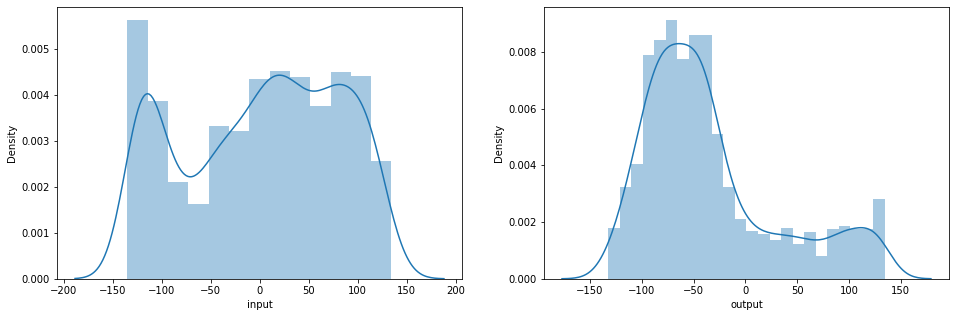

In [80]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['input'])
plt.subplot(1,2,2)
sns.distplot(df1['output'])
plt.show()

### Conclusions

- Our dataset had 2 Null values each in both columns. We have removed all the Null values.

- From above visualization we can see that this dataset is not uniformly distributed. So we will apply feature engineering techniques like Standardization, Normalization by Scaling functions from sklearn.


## Step 3: Build a Machine Learning Model to predict output based on the input column.

### Linear Regression 

In [94]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=10)

# Fit the linear regression model to the training data
model = LinearRegression().fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("R^2: ", model.score(X_test, y_test))

R^2:  0.27858796224934945


### Support Vector Regressor

In [95]:
from sklearn.svm import SVR

model = SVR().fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("R^2: ", model.score(X_test, y_test))



R^2:  0.6536518346549129


### Lasso Regression

In [105]:
from sklearn import linear_model

lassoReg = linear_model.Lasso(alpha=0.03)
lassoReg.fit(X,y)

model = lassoReg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("R^2: ", model.score(X_test, y_test))

R^2:  0.27858758607192924


### Decision Tree Regressor

In [104]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=2)

model = regr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("R^2: ", model.score(X_test, y_test))


R^2:  0.6557891831322342


### Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=2, n_informative=2, random_state=0, shuffle=False)
rfr = RandomForestRegressor(max_depth=3)

model = rfr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("R^2: ", model.score(X_test, y_test))




R^2:  0.7042464235017092


## Step 4: **Bonus (max weightage) Make sure to apply: Proper outlier detection and treatment. Feature Engineering Hyperparameter Tuning

We'll use boxplot to detect outliers.

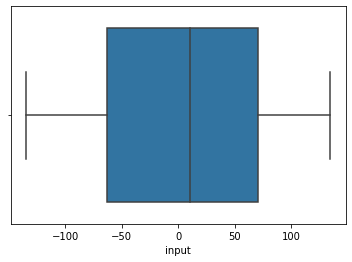

In [84]:
import seaborn as sns
sns.boxplot(df1["input"])

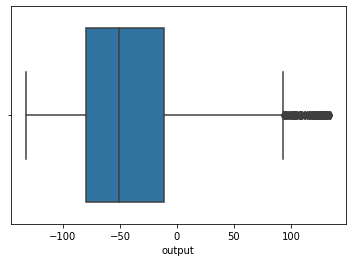

In [85]:

sns.boxplot(df1["output"])

---

## Step 5: Use appropriate evaluation metrics and compare all the models and write your observations i.e. why is one model better than the other?



---

| Sr. no. | Algorithm | Accuracy |
| :-: | :-: | :-: |
| 1. | Linear Regression | 0.278
| 2. | SVR | 0.654
| 3. | Lasso Regression | 0.278
| 4. | Decision Tree | 0.656
| 5. | Random Forest | 0.704

---


### From above table we can see that Random Forest gives accuracy of 70% as compared to others so we'll use random forest for prediction.

## Step 6: **Bonus (max weightage) Build a Linear Regression model by performing appropriate feature engineering.

Testing random inputs.

In [106]:
rfr.predict([[228]])

array([102.24548487])

In [107]:
rfr.predict([[-129.894781]])

array([-55.27955062])